✅ Preview of GHG Inventory Data


,Year,Sector,Subsector,Gas,Activity,Emission Factor,Unit
0,2020,Energy,Electricity Generation,CO2,500000,0.450,kgCO2/kWh
1,2020,Energy,Transport,CO2,300000,2.310,kgCO2/L
2,2020,Agriculture,Livestock Enteric CH4,CH4,10000,0.023,kgCH4/head
3,2021,Energy,Electricity Generation,CO2,520000,0.450,kgCO2/kWh
4,2021,Energy,Transport,CO2,320000,2.310,kgCO2/L



📊 Emissions by Sector and Year:


Sector,Agriculture,Energy
Year,,
2020,230.0,918000.0
2021,253.0,973200.0


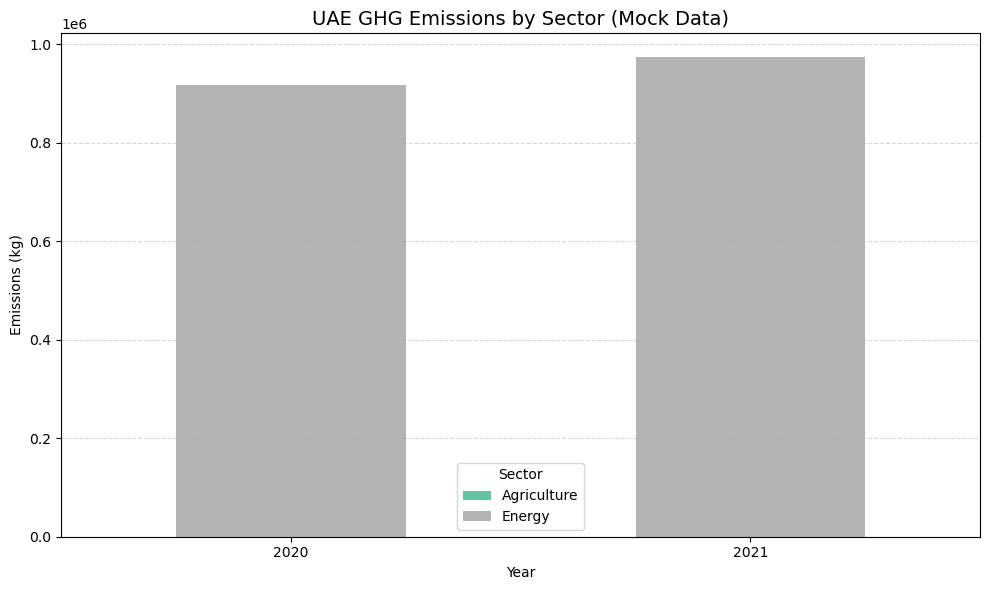


📊 Emissions by Gas and Year:


Gas,CH4,CO2
Year,,
2020,230.0,918000.0
2021,253.0,973200.0


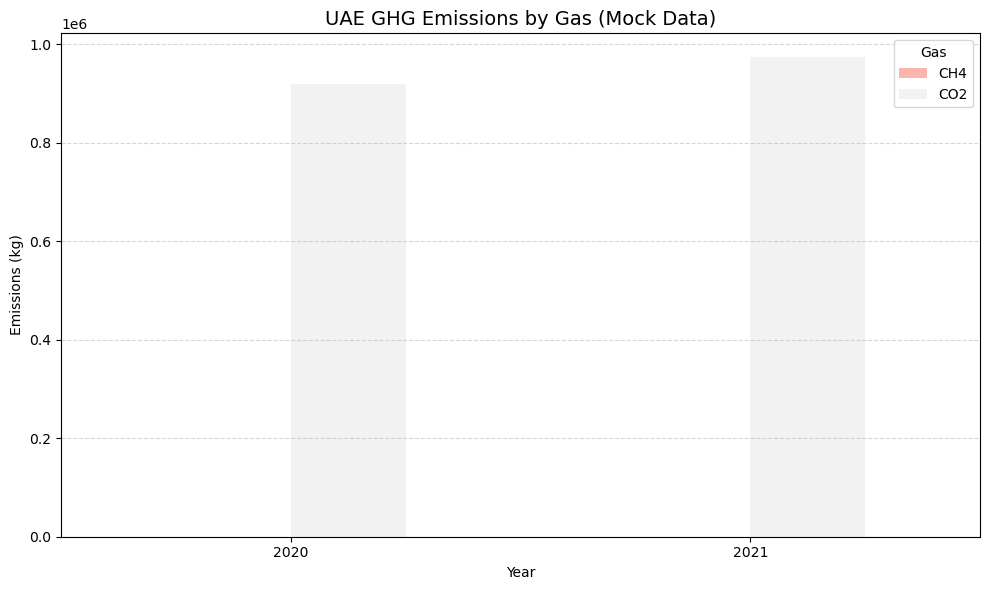


📈 Total GHG Emissions Per Year:


Year
2020    918230.0
2021    973453.0
Name: Emissions (kg), dtype: float64

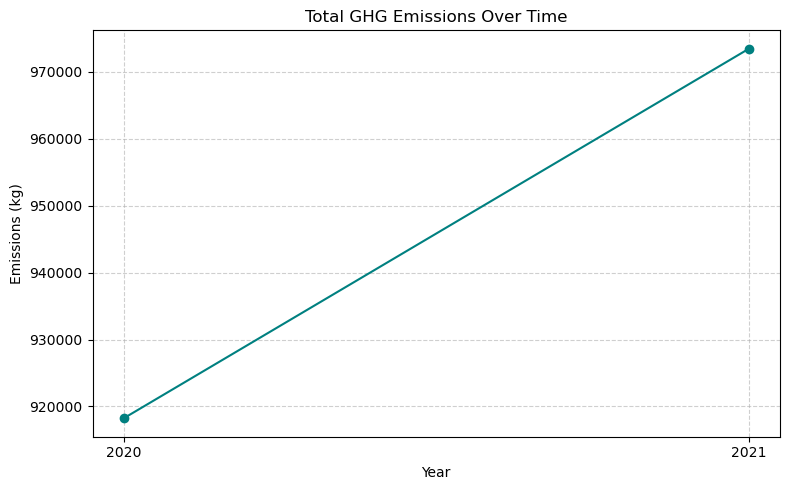


📉 Year-over-Year % Change in Emissions:


,Year,Emissions (kg),Change (%)
0,2020,918230.0,NaN
1,2021,973453.0,6.014071


📂 Summary files exported to outputs/


In [13]:
# 📦 Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📄 Load dataset
df = pd.read_csv('../data/uae_ghg_inventory_mock.csv')

# 👁️ Preview the data
print("✅ Preview of GHG Inventory Data")
display(df.head())

# 🧮 Calculate emissions: Activity × Emission Factor
df['Emissions (kg)'] = df['Activity'] * df['Emission Factor']

# 🎯 Emissions by Year & Sector
sector_summary = df.groupby(['Year', 'Sector'])['Emissions (kg)'].sum().unstack()

print("\n📊 Emissions by Sector and Year:")
display(sector_summary)

# 📊 Plot stacked bar by sector
sector_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('UAE GHG Emissions by Sector (Mock Data)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Emissions (kg)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 🔬 Emissions by Gas
gas_summary = df.groupby(['Year', 'Gas'])['Emissions (kg)'].sum().unstack()

print("\n📊 Emissions by Gas and Year:")
display(gas_summary)

# 📈 Plot gas summary
gas_summary.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')
plt.title('UAE GHG Emissions by Gas (Mock Data)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Emissions (kg)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 📈 Emissions Trend Over Time
yearly_total = df.groupby('Year')['Emissions (kg)'].sum()

print("\n📈 Total GHG Emissions Per Year:")
display(yearly_total)

yearly_total.plot(kind='line', marker='o', color='teal', figsize=(8, 5))
plt.title('Total GHG Emissions Over Time')
plt.ylabel('Emissions (kg)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_total.index)
plt.tight_layout()
plt.show()

# 📉 Year-over-Year Change (%)
df_year = yearly_total.reset_index()
df_year['Change (%)'] = df_year['Emissions (kg)'].pct_change() * 100

print("\n📉 Year-over-Year % Change in Emissions:")
display(df_year)

# 📤 Export summary tables
sector_summary.to_csv('../outputs/emissions_by_sector.csv')
gas_summary.to_csv('../outputs/emissions_by_gas.csv')
df_year.to_csv('../outputs/yearly_emissions_changes.csv', index=False)

print("📂 Summary files exported to outputs/")
